In [41]:
import numpy as np
import pionSSA as pion
import matplotlib.pyplot as plt
import importlib
importlib.reload(pion)

# setup plotting
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["axes.labelsize"] = 25  
plt.rcParams["xtick.labelsize"] = 20  
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["axes.titlesize"] = 18  
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"
%config InlineBackend.figure_format = 'retina'
plt.rcParams['axes.xmargin'] = 0


In [45]:
ssa = pion.PionSSA(fit_type='pp')

ts = np.logspace(-3, -1, 20)

s = 100**2
Q = np.sqrt(10)
x = 0.01

kins = pion.Kinematics(s=s, Q=Q, x=x, t=0.1)
kins.y = (kins.Q**2)/(kins.s * kins.x)

assert kins.y < 1, f'error: y={kins.y}>1'

harms = ['sin(phi)', 'sin(2phi)']
int_ssas = {h: {tp: [] for tp in ['num', 'den', 'ssa']} for h in harms}
ssas = {h: {tp: [] for tp in ['num', 'den', 'ssa']} for h in harms}

space = {
    'Q2': [1, 100],
    'y': [0.05, 0.95]
}

nreps = 10
for irep in range(1, nreps):
    ssa.set_params(irep)

    for h in harms:

        int_rep = ssa.get_integrated_ssa(ts, s, space, harmonic=h, points=4)
        for tp in ['num', 'den', 'ssa']:
            int_ssas[h][tp].append(int_rep[tp])

        rep = {tp: [] for tp in ['num', 'den', 'ssa']}
        for t in ts:
            kins.t = t
            rep_point = ssa.get_ssa(kins, harmonic=h)
            for tp in ['num', 'den', 'ssa']: rep[tp].append(rep_point[tp])
        ssas[h][tp].append(rep[tp])



--> loaded params from /dipoles/replica_params_pp.csv
--> loaded replica 1
--> loaded replica 1
--> loaded replica 2
--> loaded replica 3
--> loaded replica 4
--> loaded replica 5
--> loaded replica 6
--> loaded replica 7
--> loaded replica 8
--> loaded replica 9


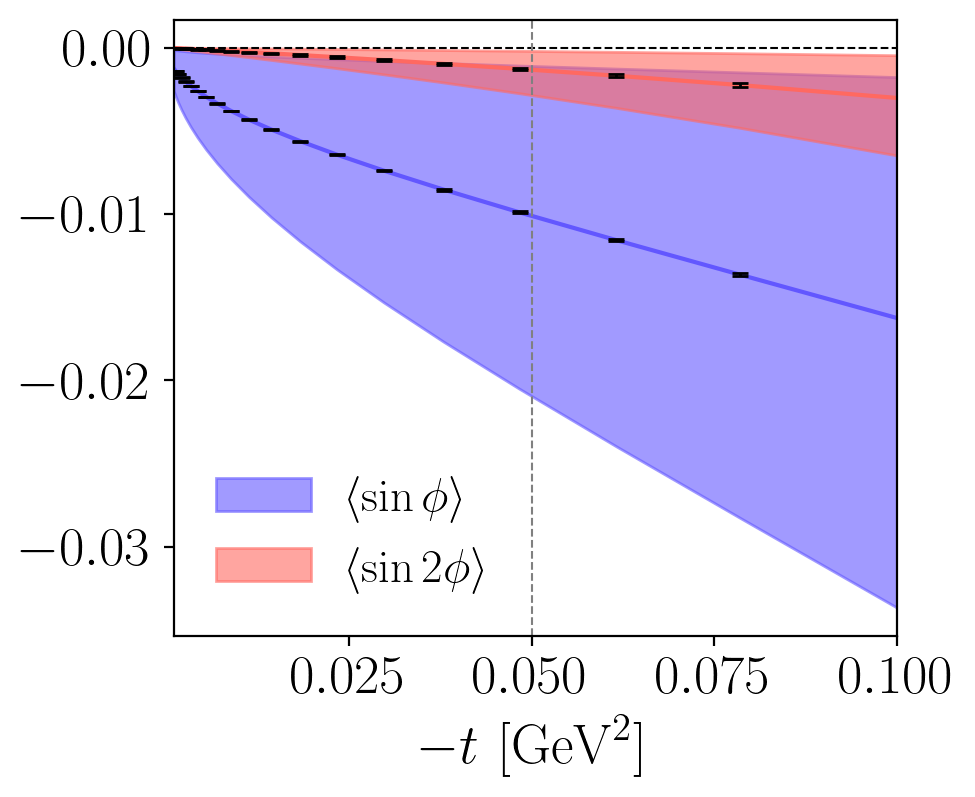

In [73]:
asp_ratio = 3.5/3
psize = 4
nrows, ncols = 1,1
fig, ax = plt.subplots(nrows, ncols, figsize=(asp_ratio*psize*ncols, psize*nrows))

plot_band = True
plot_mean = True
integrated = True
only_prima = False
if only_prima: 
    plot_band = False
    integrated = False

colors = ['#6257ff','#FF6961']
labels = [r'$\langle \sin \phi \rangle$', r'$\langle \sin 2 \phi \rangle$']

for ih, h in enumerate(harms):
    if ih == 1: 
        xf = 1
        # labels[ih] += rf'$\times {xf}$'
    else: xf = 1
    
    if integrated: data = int_ssas[h]['ssa']
    else: data = ssas[h]

    if only_prima: 
        data = int_ssas[h]['den']
        if ih > 0: break

    bands = ssa.get_bands(data)

    if plot_band:
        ax.fill_between(ts, xf*bands['lower'], xf*bands['upper'], alpha=0.6, color=colors[ih], label=labels[ih])
        if plot_mean: ax.plot(ts, xf*bands['mean'], alpha=1.0, color=colors[ih])

        # ax.errorbar(
        #     ts[1:-1], bands['mean'][1:-1], yerr=np.sqrt(2/(np.array(int_ssas[h]['den'][0])[1:-1] * 100)), fmt='o',
        #     capsize=3, elinewidth=1, capthick=1, color='black', markersize=0, 
        #     # label=rf'Stat. error (10 $\mathrm{{fb}}^{{-1}}$)'
        # )
        ax.errorbar(
            ts[1:-1], bands['mean'][1:-1], yerr=np.sqrt(2/(np.array(int_ssas[h]['den'][0])[1:-1] * 10)), fmt='o',
            capsize=3, elinewidth=1, capthick=1, color='black', markersize=0, 
            # label=rf'Stat. error (10 $\mathrm{{fb}}^{{-1}}$)'
        )
    else:
        for irep, rep in enumerate(data):

            if irep == 0: label=labels[ih]
            else: label = None

            if only_prima: 
                label = None
                if irep > 0: break
                alpha = 1.0
            else:
                alpha = 0.2

            ax.plot(ts, xf*rep, alpha=alpha, color=colors[ih], label=label)

ax.set_xlabel(r'$-t\,\,[\mathrm{GeV}^2]$', size=20)
# ax.set_title(r'$ \frac{d}{dt} \langle \sin \phi \rangle $', size=25, pad=15)
ax.axhline(y=0, linestyle='--', color='black', linewidth=0.75)
ax.axvline(x=0.05, linestyle='--', color='gray', linewidth=0.75)
# ax.semilogx()
if only_prima:
    ax.semilogy()
    ax.set_title(r'$ d\sigma^{\mathrm{Primakoff}} \,\, [\mathrm{fb}/{\mathrm{GeV}^2}]$', size=15)
else: ax.legend(frameon=False, fontsize=17)

plt.show()